### EEG Digital Signals Processing

Each file contains around 256 signals per second were recorded over 3600 seconds; resulting in 921600 signals / seconds and there are 23 columns corresponding to the 23 channels.

Drawing an example of the signals

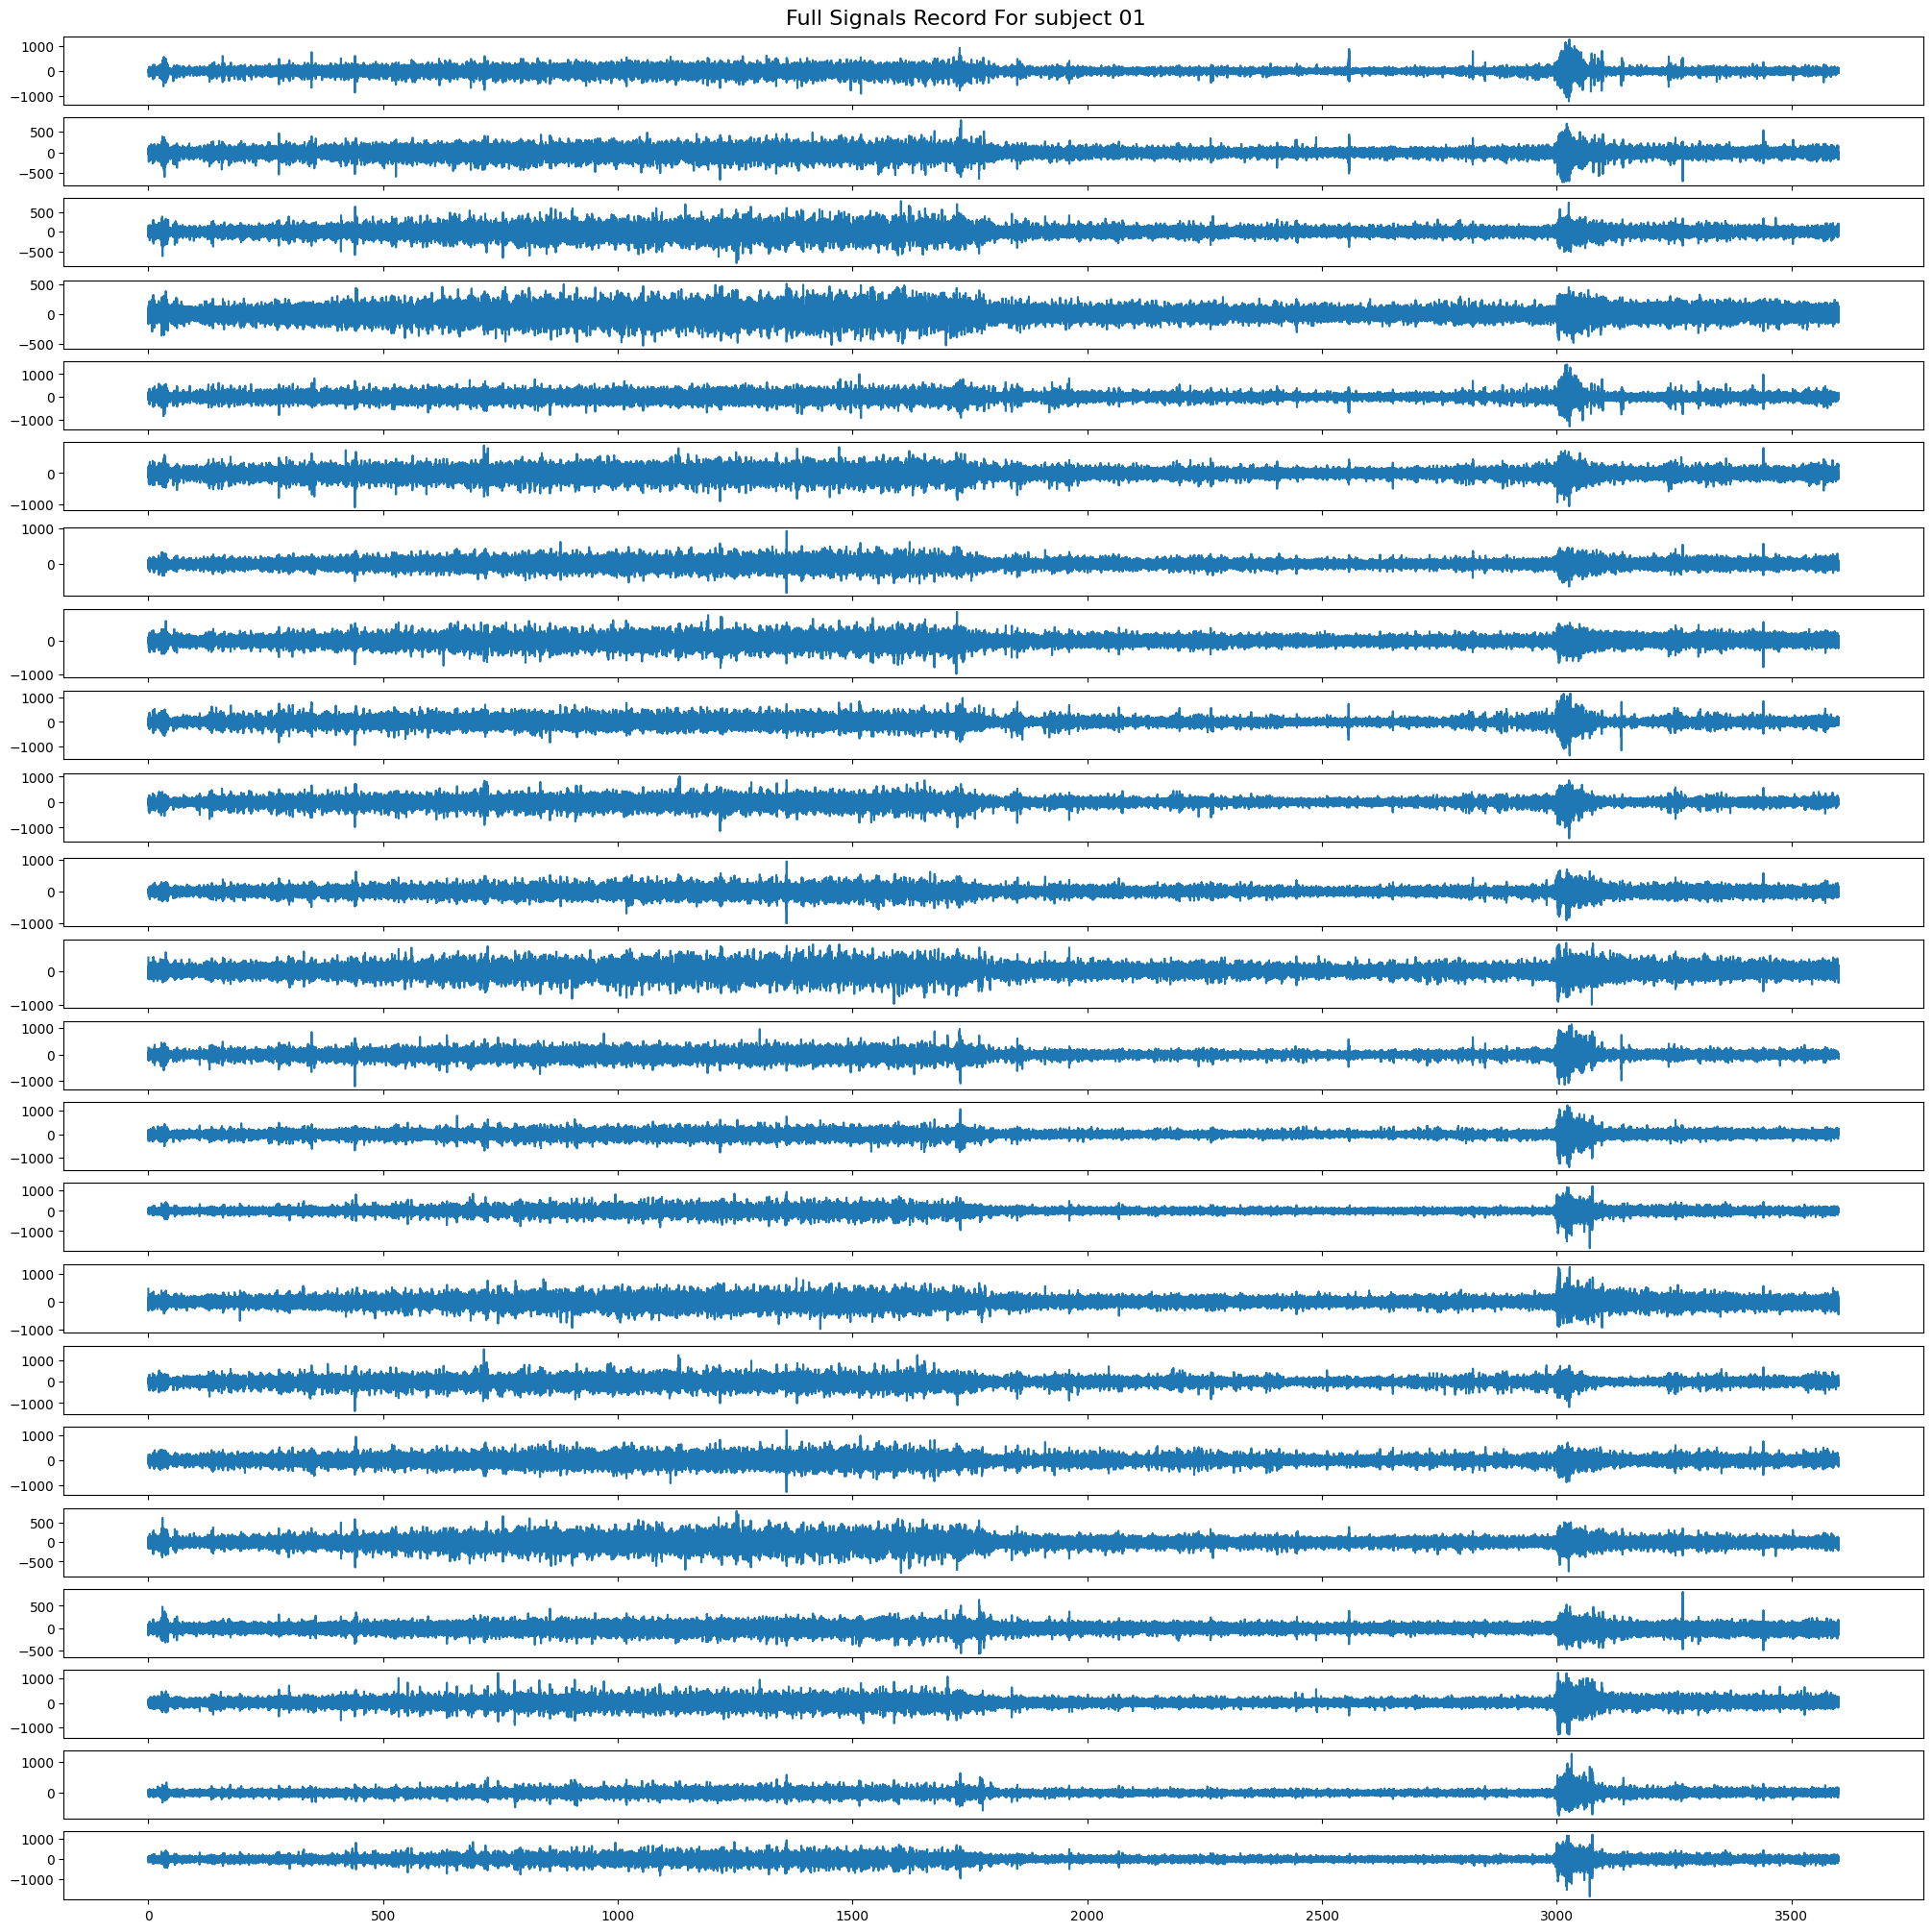

In [51]:
import scipy.io
import matplotlib.pyplot as plt
from numpy.core import linspace

# load the mat file 1
mat1 = scipy.io.loadmat(
    'data/01_01_edfm.mat')
data1 = mat1["val"]

i , j = 0 ,0
fig, axs = plt.subplots(data1.shape[0], 1, sharex=True, figsize=(20, 20), layout='constrained')
plt.suptitle('Full Signals Record For subject 01', fontsize=16)

for channel in range(0, len(data1)):
    t = linspace(0, 3600, len(data1[channel]), endpoint=True)
    # plot time signal:
    axs[channel].plot(t, data1[channel])
    j += 1

    # axs2.plot(t, data1[channel]) #shows the summation of all channels
    if j == nc:  # we exceeded the columns
        i += 1
        j = 0
    if i == nr:
        break #number of channels are more that the capacity of this figure


Text(0.5, 0, 'time (s)')

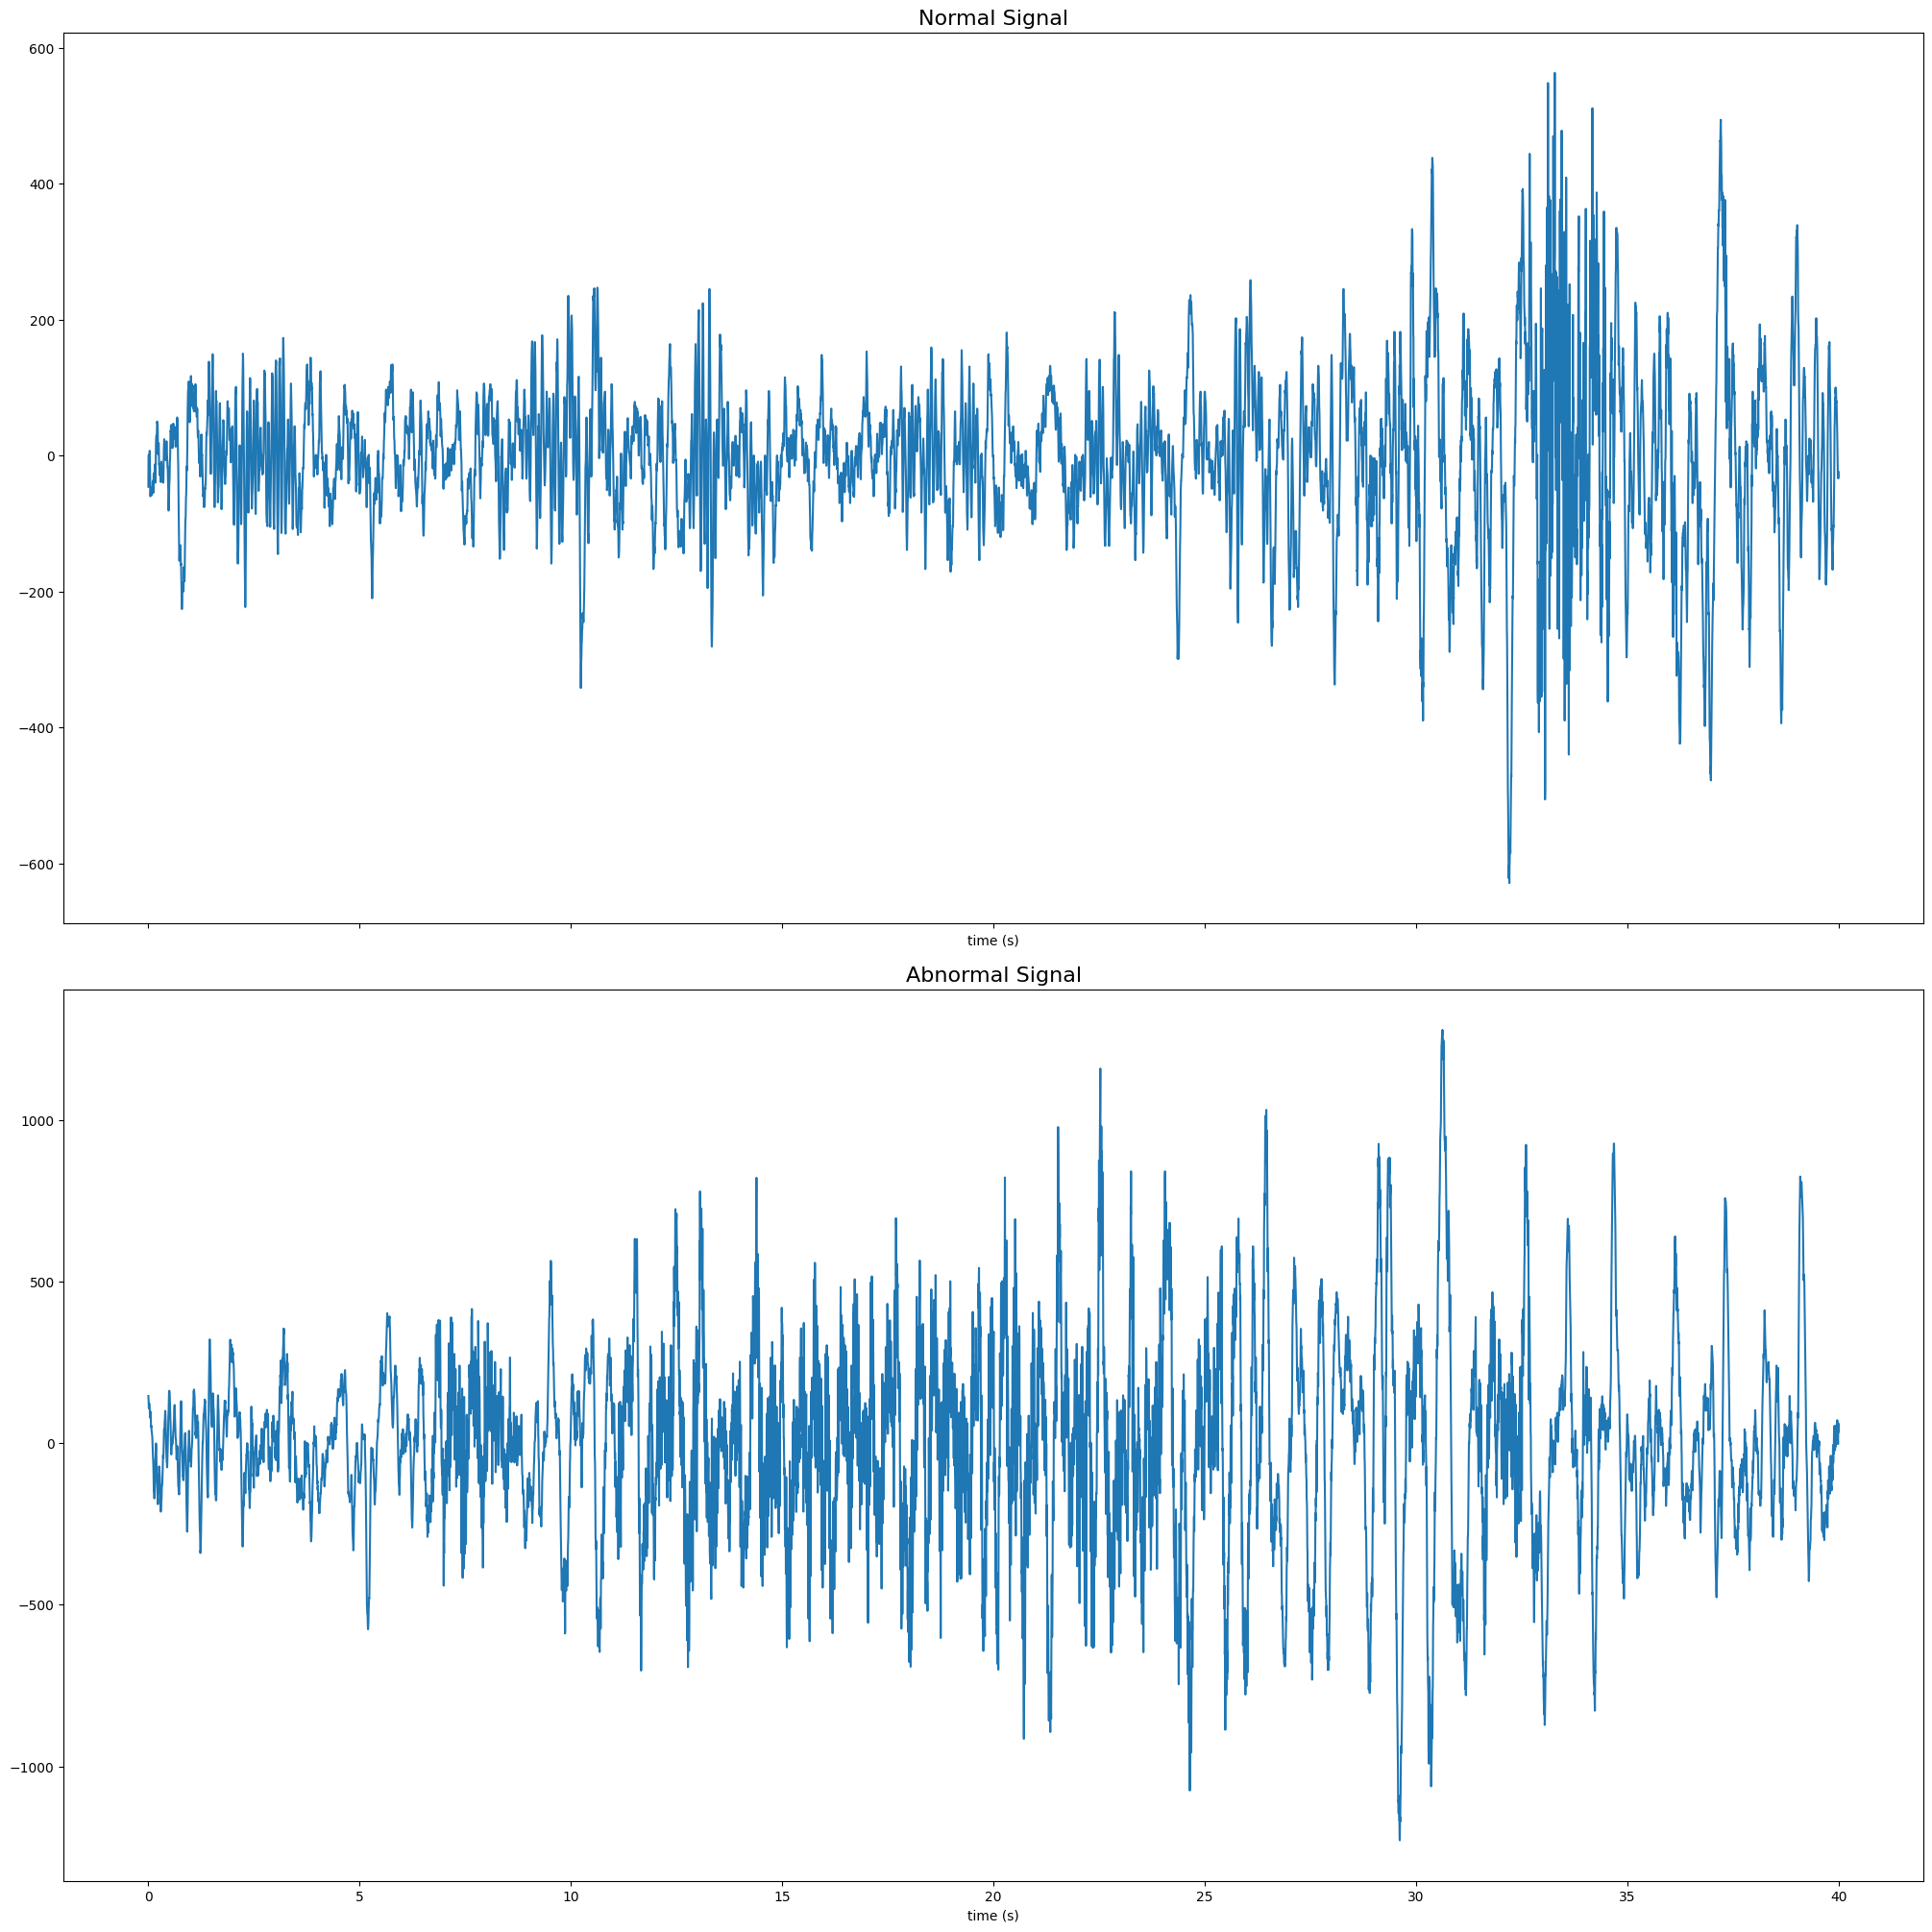

In [58]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20, 20), layout='constrained')
t = linspace(0, 40, 40*256, endpoint=True)
ax1.plot(t, data1[0][0:10240])
ax1.set_title('Normal Signal', fontsize=16)
ax1.set_xlabel('time (s)')

ax2.plot(t, data1[0][766976:777216])
ax2.set_title('Abnormal Signal', fontsize=16)
ax2.set_xlabel('time (s)')

Removing DC Offset

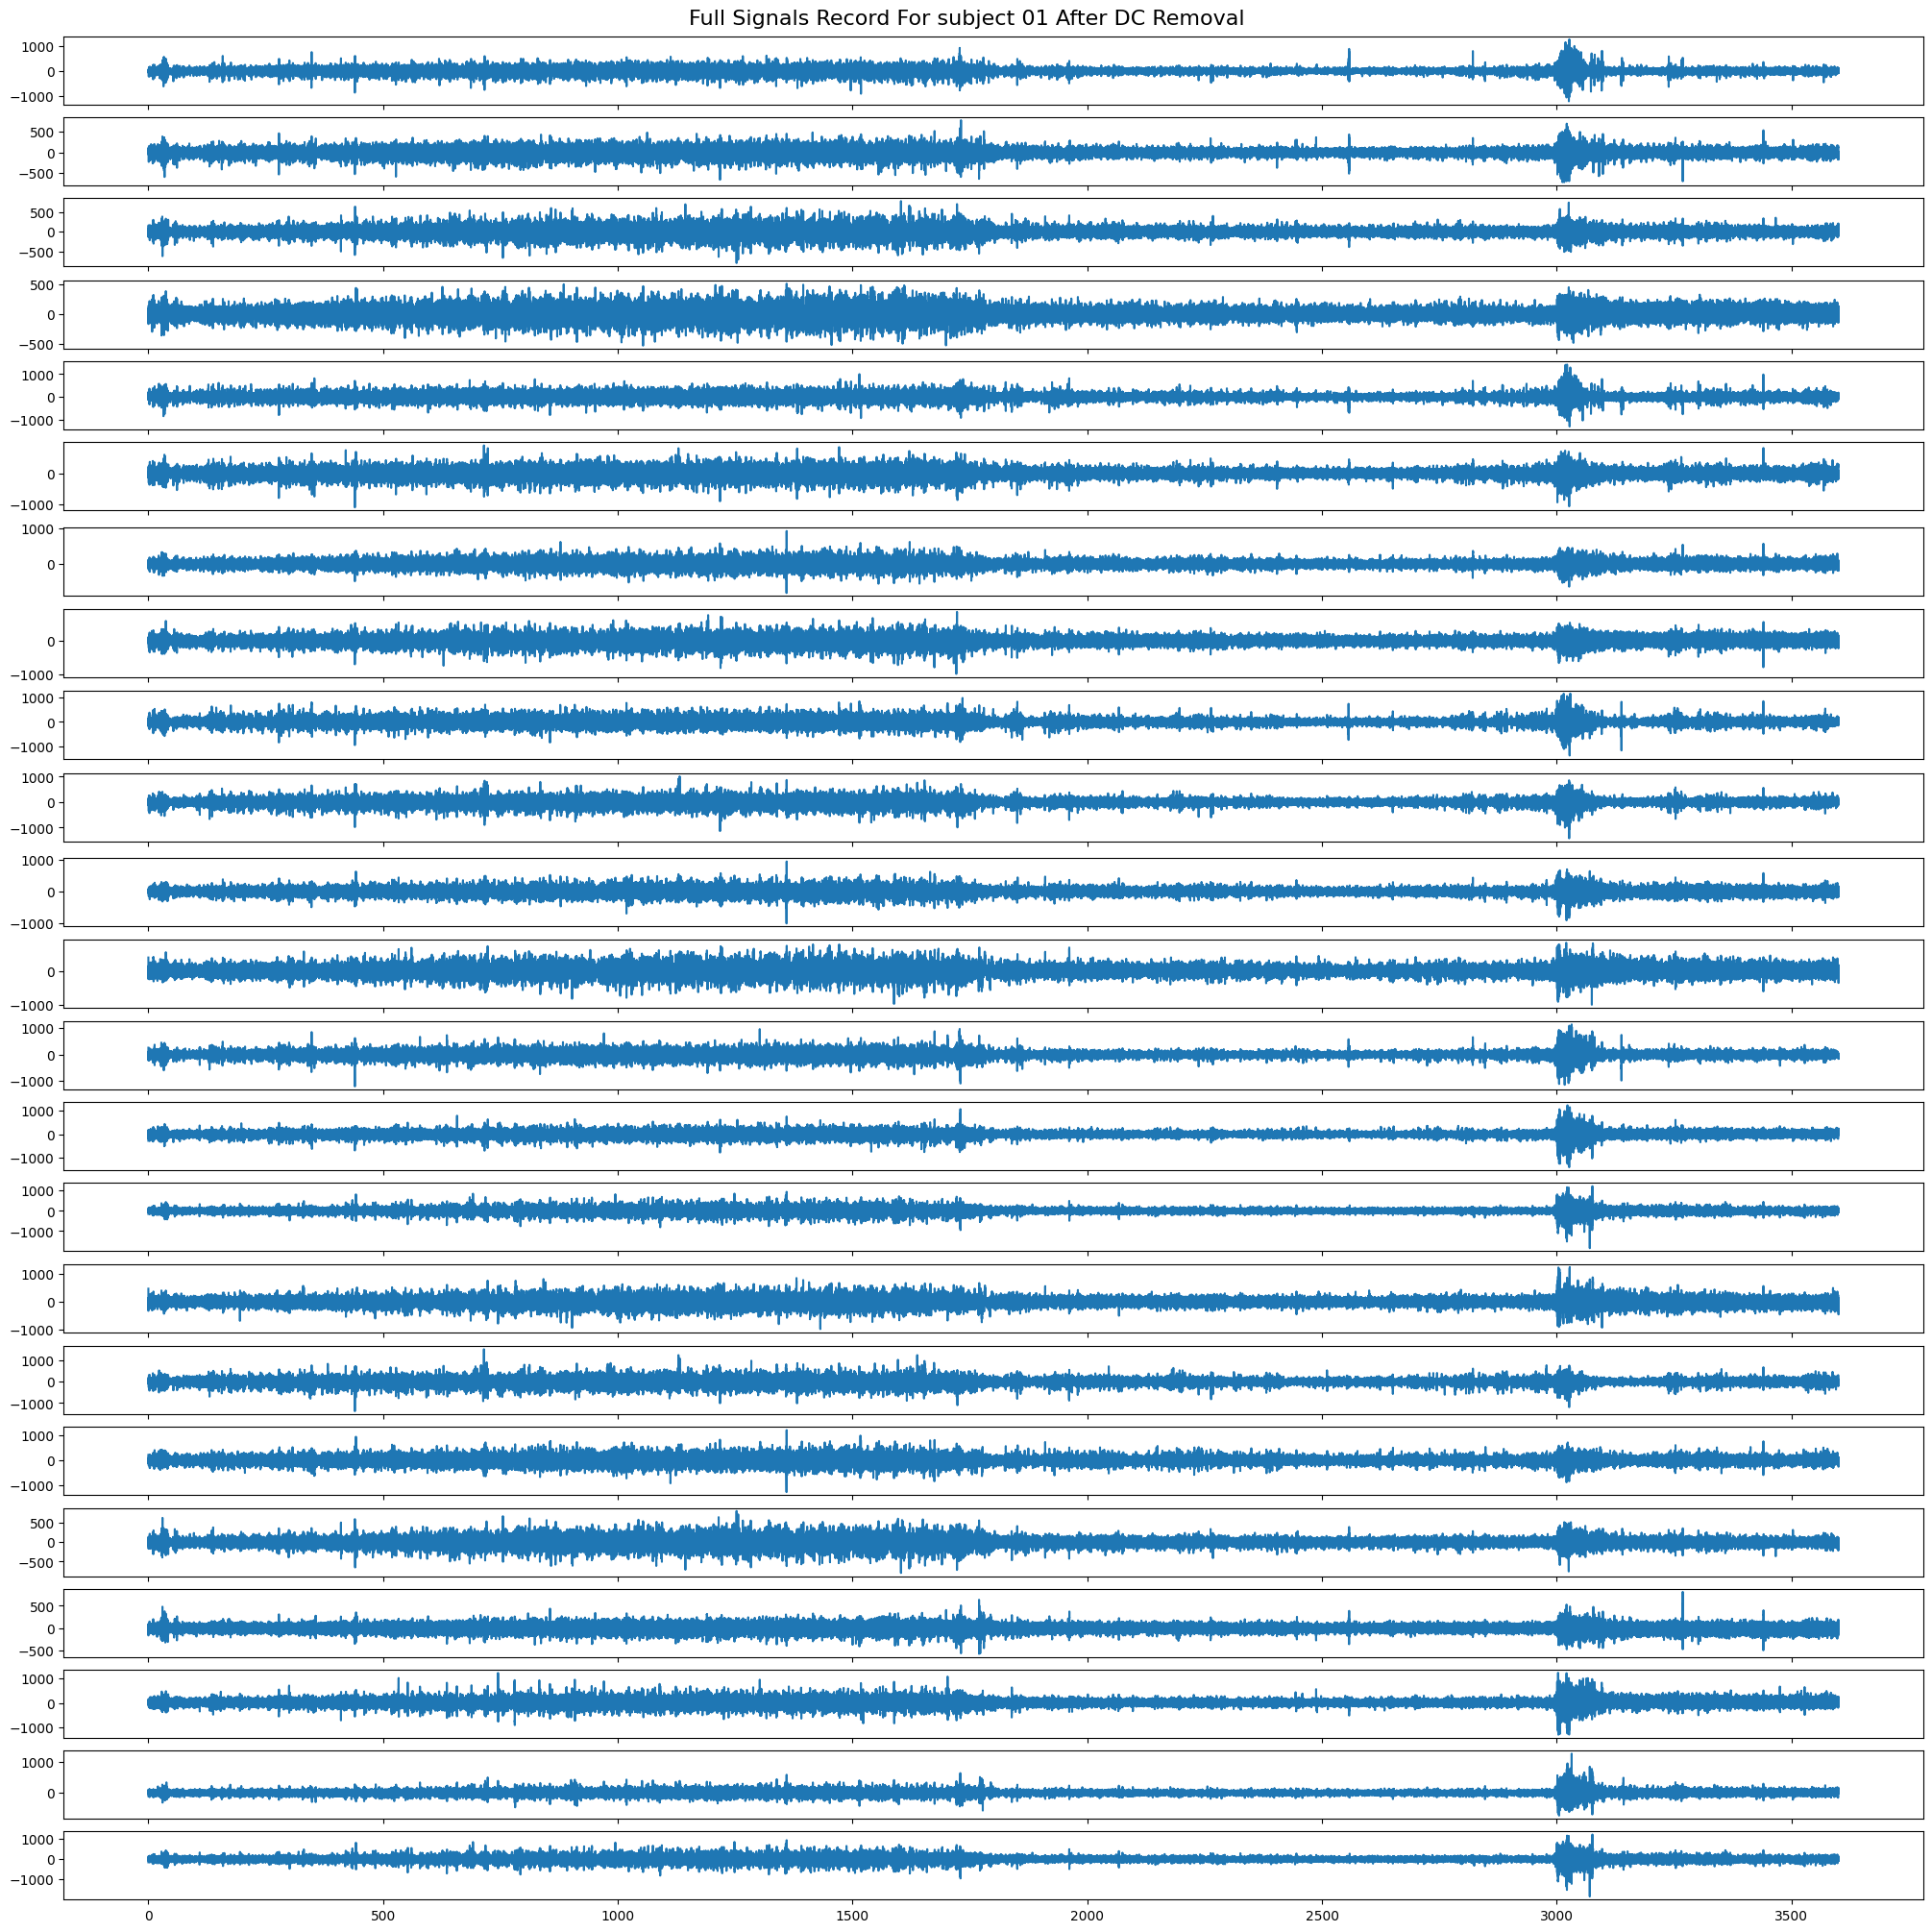

In [59]:
import numpy as np

i , j = 0 ,0
fig, axs = plt.subplots(data1.shape[0], 1, sharex=True, figsize=(20, 20), layout='constrained')
plt.suptitle('Full Signals Record For subject 01 After DC Removal', fontsize=16)

for channel in range(0, len(data1)):
    t = linspace(0, 3600, len(data1[channel]), endpoint=True)
    channel_DCRemoved = data1[channel] - np.mean(data1[channel])
    # plot time signal:
    axs[channel].plot(t, channel_DCRemoved)
    j += 1

    # axs2.plot(t, data1[channel]) #shows the summation of all channels
    if j == nc:  # we exceeded the columns
        i += 1
        j = 0
    if i == nr:
        break #number of channels are more that the capacity of this figure
